## Exploratory Data Analysis
#### First peek into dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
w_data = pd.read_csv('climate_hour.csv')
w_data.rename(index=str, columns={'Date Time': 'dt'}, inplace=True)
## set datetime col as datetime data type
w_data.dt = pd.to_datetime(w_data.dt)
## set datetime col as index 
w_data.set_index('dt', inplace=True)
w_data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
dt,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


All attributes in this dataset are numeric and the scalers among these attributes are quite different.
For instance, the values in p(mbar) column seems around 1000 and the max.wv (m/s) column seems to have values lower than 1.

***
#### Statistical Description

In [3]:
w_data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000
mean,989.214407,9.441694,283.484141,4.953132,76.029050,13.567671,9.532164,4.035420,6.021406,9.638610,1216.101047,1.701543,2.961253,174.943301
std,8.360583,8.420257,8.501338,6.731520,16.457667,7.734023,4.184210,4.890396,2.656194,4.235455,39.964559,65.472610,75.626524,86.619521
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.430000,0.230000,65.290000,7.770000,6.210000,0.870000,3.920000,6.290000,1187.560000,0.990000,1.760000,125.500000
50%,989.580000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.180000,5.590000,8.960000,1213.850000,1.760000,2.960000,198.400000
75%,994.730000,15.460000,289.510000,10.070000,89.500000,17.590000,12.350000,5.290000,7.800000,12.480000,1242.850000,2.860000,4.730000,234.300000
max,1015.290000,37.280000,311.210000,22.940000,100.000000,63.770000,28.040000,46.010000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


First, we can notice that there is no missing values in this dataset according to that all values in count row is 70073.
Second, we can get the basic idea of how each attribute are distribute after acquiring the five number summary of all attributes.
Take sh (g/kg) column for example, the min and max is about 0.5 and 18 respectively. Hence, we expect that the 50th percentile should be near to 10.
However, the 50th percentile is 6, much lower than what we expected. This indicate the distribution of sh (g/kg) column is right-skewed.
Third, besides the five number summary, standard deviation give us an insight into the degree that these attributes spread.
Based on the range and standard deviation, even though column P (mbar) and T (degC) have close standard deviations (8.360583, 8.420257), 
the range sizes 100 and 60, approximately, determine the P (mbar) degree of spreading will be greater than T (degC).  

***
#### Distribution Plots

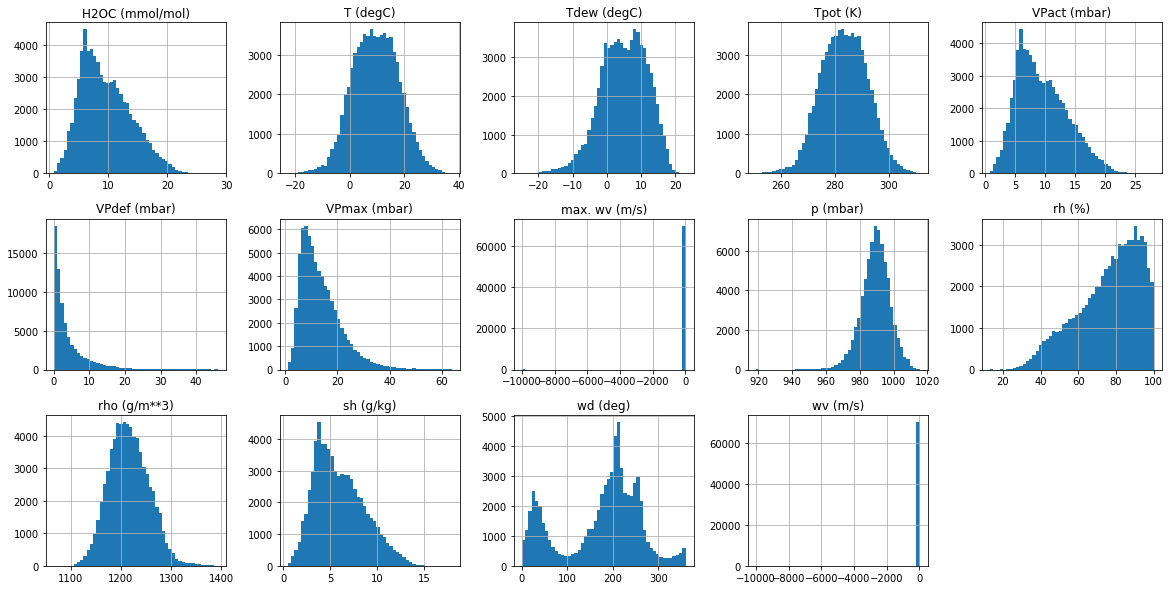

In [10]:
w_data.hist(figsize=(20,10),layout=(3,5), bins=50)
print('')

Above plots depicts how each attribute is distributed. Column T, p, Tpot, rho, and Tdew are pretty well bell-shaped distributed. Column wv and max.wv are virtually a bar that indicates all values in these two attributes are highly condensed. Column VPdef has a exponential distribution. Column VPmax, VPact, sh and H2OCa are right-skewed, and column rh is left-skewed. Column wd has bimodal distribution.
***

#### Correlation

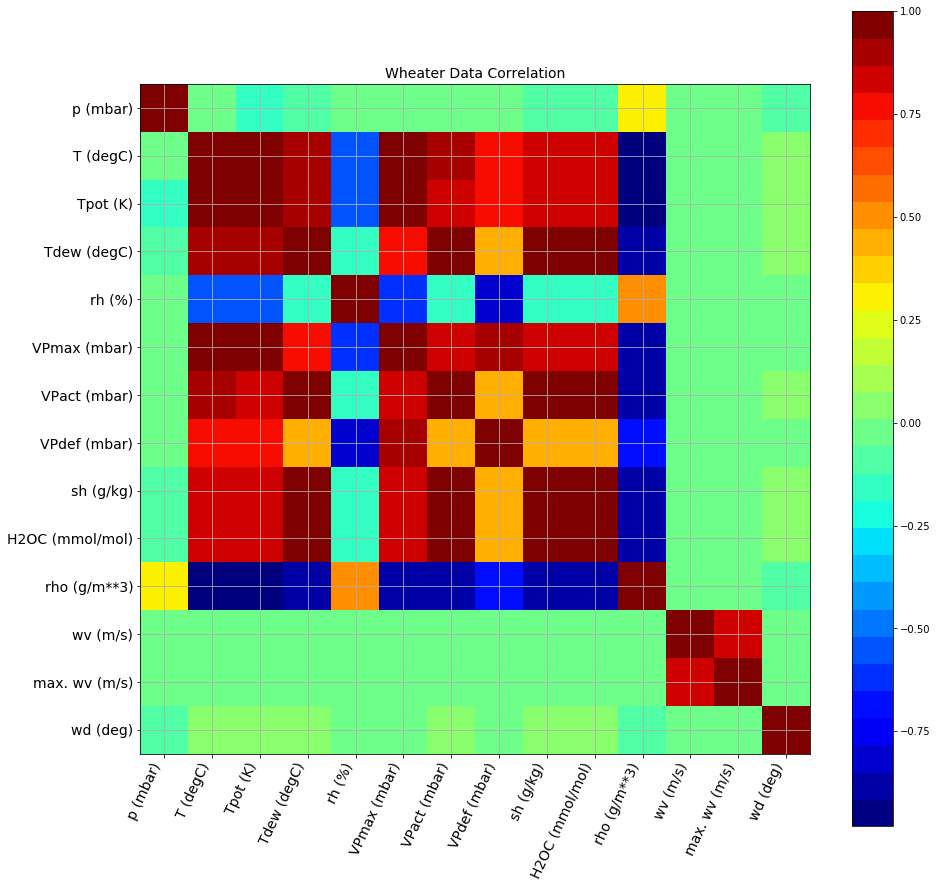

In [6]:
def correlation_matrix(df,title):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(title,fontsize=14)
    labels=list(df)
    ax1.set_xticks([i for i in range(len(labels))])
    ax1.set_xticklabels(labels,fontsize=14,rotation=65, horizontalalignment="right")
    ax1.set_yticks([i for i in range(len(labels))])
    ax1.set_yticklabels(labels,fontsize=14)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1.0,-0.75,-0.5,-0.25,.0,.25,.50,.75,1])
    plt.show()

correlation_matrix(w_data,'Wheater Data Correlation')

For dependent variable, correlation matrix plot helps to obtain how each independent variable contributes in predicting T. In result, attribute p, wv, max.wv and wd seem to have no contribution in predicting target variable. In contrary, attribute Tpot, Tdew, VPmax, VPact, VPdef, sh and H2OC have positive and strong relationship with T. Attribute rho has negative and strong relationship with the target variable and attribute rh has negative and moderate relationship with the target variable.

For independent variables, correlation matrix plot helps to spot multicollinearity issue. In the plot, independent variable tpot, VPmax, Tdew, VPact, sh, and H2OC are highly correlated (with almost 1 correlation). Since multicollinearity could cause abnormal beta coefficients and inaccurate prediction in multi-linear regression, it is good to be aware of that while neural network is a complex linear system.
***

#### Time Series Plot

In [7]:
YMdic = {'YMD':[],'min':[],'max':[],'avg':[]}
for y in range(2009, 2017):
    for m in range(1,13):
        start = '{}-{}-1 01:00:00'.format(y,m)
        next_m = m+1
        if next_m > 12:
            y+=1
            next_m = 1
        end = '{}-{}-1 01:00:00'.format(y,next_m)
            
        YMdic['YMD'].append('{}-{}-1'.format(y,m))
        YMdic['min'].append(w_data.loc[start:end]['T (degC)'].min())
        YMdic['max'].append(w_data.loc[start:end]['T (degC)'].max())
        YMdic['avg'].append(w_data.loc[start:end]['T (degC)'].mean())

In [8]:
month_bined_data = pd.DataFrame(YMdic)
month_bined_data.YMD = pd.to_datetime(month_bined_data.YMD)
month_bined_data.set_index('YMD', inplace=True)
month_bined_data.head()

,min,max,avg
YMD,,,
2009-01-01,-10.21,30.05,3.121839
2009-02-01,-11.12,27.70,4.268143
2009-03-01,-9.46,27.38,6.179383
2009-04-01,-4.83,25.61,10.430111
2009-05-01,-13.34,26.95,11.924846


(733408.0, 736330.0)

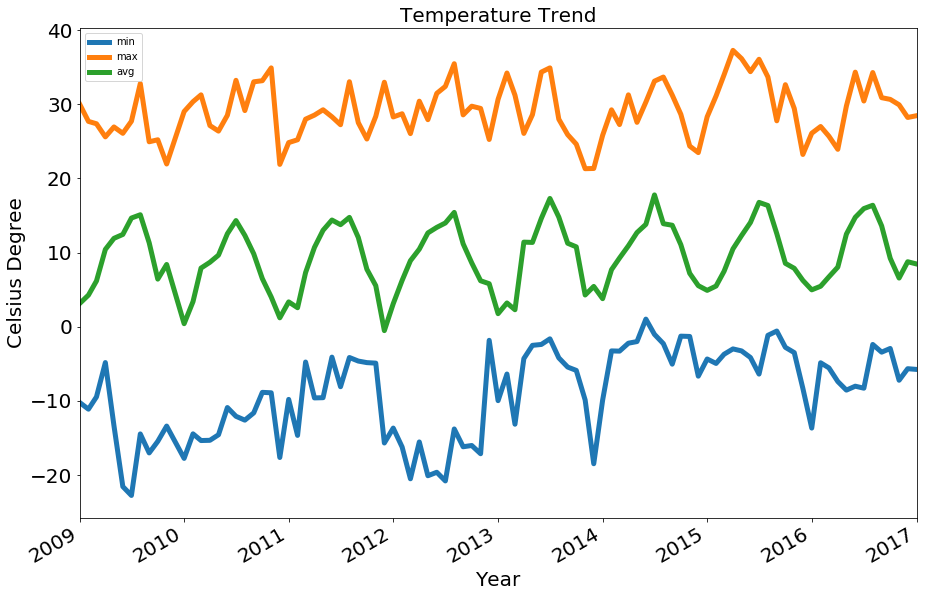

In [9]:
import matplotlib.pyplot as plt
ax = month_bined_data.plot(figsize=(15,10), linewidth=5, fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Celsius Degree',fontsize=20)
plt.title('Temperature Trend',fontsize=20)
plt.xlim(('2009', '2017'))

In the Temperature Trend plot above, it is noticeable that the minimum temperature has been going up from 2009 to 2017 and 2014 is the changing point.
The range of minimum temperature before 2014 is around 20 Celsius degree from -23 to -3, and the range of minimum temperature after 2014 is around 10 Celsius degree from -13 to 0.
The trend of maximum and average temperature didn't change to much.
***
***

#### **Install packages

In [30]:
!pip install --upgrade pip
!pip install --user Tensorflow
!pip3 install --upgrade keras==2.1.3
!pip install --user pydot
!pip install --user graphviz

Requirement already up-to-date: pip in /opt/anaconda3/lib/python3.6/site-packages (18.1)
Requirement already up-to-date: keras==2.1.3 in /opt/anaconda3/lib/python3.6/site-packages (2.1.3)


***
***
## Model building
### Preprocessing

#### Open the file 

In [2]:
f = open('climate_hour.csv')

#### Read file into a list

In [3]:
data = list(map(lambda row:row.strip().split(',') ,f.readlines()))

#### Separate the header and data

In [4]:
header = data[0].copy()
data = data[1:].copy()

#### Make values from string to float

In [5]:
data = [[float(row[i]) if i != 0 else row[i] for i in range(len(row))] for row in data]

#### Join every 24 hours data into one row

In [6]:
import functools
timestep = 24
data_bin = [functools.reduce(lambda x,y:x+y[1:], data[i-timestep:i]) for i in range(timestep,len(data)+1)]

#### Find the split point (index)

In [7]:
test_start = '31.12.2014 00:00:00'
split_point = [x[0]==test_start for x in data_bin].index(True)
print(split_point)

52542


#### Split the x-part data

In [8]:
x_train, x_test = data_bin[:split_point], data_bin[split_point:-1]

#### Split the y-part data

In [9]:
y_train, y_test = [[data_bin[i][-13]] for i in range(1,split_point+1)], [[data_bin[i][-13]] for i in range(split_point+1,len(data_bin))]

In [10]:
print(y_train[:3], y_train[-3:], sep='\n')
print(y_test[:3], y_test[-3:], sep='\n')

[[-4.44], [-4.29], [-4.45]]
[[1.96], [1.94], [2.18]]
[[2.06], [2.22], [2.04]]
[[-2.59], [-3.76], [-4.82]]


#### Drop the estimation time columns

In [11]:
x_train, x_test = pd.DataFrame(x_train), pd.DataFrame(x_test)
x_train.drop(x_train.columns[0], axis = 1, inplace = True)
x_test.drop(x_test.columns[0], axis = 1, inplace = True)

#### Normalize data based on x_train data

In [12]:
from sklearn import preprocessing
x_mm_scaler = preprocessing.MinMaxScaler().fit(x_train)
x_train_norm = x_mm_scaler.transform(x_train)
x_test_norm = x_mm_scaler.transform(x_test)

y_mm_scaler = preprocessing.MinMaxScaler().fit(pd.DataFrame(x_train.iloc[:,1]))
y_train_norm = y_mm_scaler.transform(pd.DataFrame(y_train))
y_test_norm = y_mm_scaler.transform(pd.DataFrame(y_test))
# new_x_train = mm_scaler.inverse_transform(x_train_norm)

#### Reshape the x_part data to kares accepted form

In [13]:
reshape = lambda data, x: np.array([[ row[i:i+x] for i in range(0,len(row),x)] for row in data])

In [14]:
x_train_norm_kares = reshape(x_train_norm, 14)
x_test_norm_kares = reshape(x_test_norm, 14)

***
### Define some useful functions
#### my_to_csv function

In [15]:
def my_to_csv(yhat, fname):
    ''' takes predict result, invert it back to the original scale then write a kaggle submission file'''
    ## invert the yhat to its original scale
    yhat_invert = y_mm_scaler.inverse_transform(yhat)
    times = np.array([data[i][0].replace(' ', '_') for i in range(split_point+24, len(data))])
    df = pd.DataFrame({'date_time':times,'temperature':yhat_invert.T[0]})
    df.to_csv('{}.csv'.format(fname), sep=',',index=False)

#### plot_overfit function

In [16]:
import pylab as pl
def plot_overfit(d):
    ''' 'val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error' '''
    epoch = [i+1 for i in range(len(d['mean_absolute_error']))]
    pl.plot(epoch, np.array(d['mean_absolute_error']), label='train')
    pl.plot(epoch, np.array(d['val_mean_absolute_error']), label='valid')
    pl.legend(('train','valid'))
    pl.xlabel('Epoch')
    pl.ylabel('MAE')
    pl.title('Complexity Analysis')

***
### Train and test the model
#### Build LSTM model

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import optimizers
data_dim = 14
timesteps = 24

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(timesteps, data_dim)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='linear'))

opt = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_absolute_error',optimizer=opt, metrics=['mae'])

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 64)            20224     
_________________________________________________________________
lstm_5 (LSTM)                (None, 24, 64)            33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 65,697
Trainable params: 65,697
Non-trainable params: 0
_________________________________________________________________
None


#### Train the model

In [23]:
histroy = model.fit(x_train_norm_kares, y_train_norm, batch_size=250, epochs=200, validation_data=(x_test_norm_kares, y_test_norm))

Train on 52542 samples, validate on 17471 samples
Epoch 1/200
52542/52542 [==============================] - 36s 684us/step - loss: 0.0084 - mean_absolute_error: 0.0084 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089
Epoch 2/200
52542/52542 [==============================] - 36s 677us/step - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084
Epoch 3/200
52542/52542 [==============================] - 35s 668us/step - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084
Epoch 4/200
52542/52542 [==============================] - 35s 667us/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085
Epoch 5/200
52542/52542 [==============================] - 35s 675us/step - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085
Epoch 6/200
52542/52542 [==============================] - 35s 670us/step - loss: 0.0082 -

#### Make a prediction

In [24]:
yhat = model.predict(x_test_norm_kares)

#### Visualize the predicted result

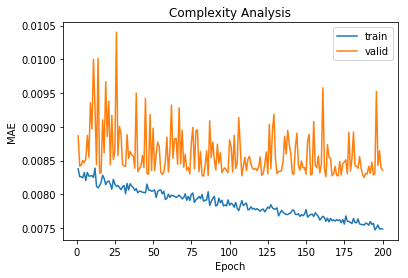

In [26]:
plot_overfit(histroy.history)